# Fundamentals of Statistics Unit 2 Lecture 4 Notes (unfinished)

In [15]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Table of Contents
- <a href=#p1>Parameter Estimation Definitions</a>
- <a href=#p2>Bias of an Estimator</a>
- <a href=#p3>Jensen's Inequality</a>
- <a href=#p4>Variance of an Estimator</a>
- <a href=#p5>Quadratic Risk</a>
- <a href=#p6>Confidence Intervals</a>

<a href="https://nbviewer.jupyter.org/github/TraceMyers/mitx-stats-notes/blob/master/Unit%202%20Lecture%204%20Notes.ipynb#P2"> Click here to render this page with nbviewer.jupyter.org and use bookmarks. </a>

# Parameter Estimation Definitions <a name='p1' />


### Statistic 

Any measurable function of the sample, e.g. $\bar{X}_n$, $max_i X_i, X_1 + log(1 + |X_n|)$, $s^2$ (sample variance), ...

<i>"If you can compute it once I give you data, it is measurable."</i>

### Estimator of $\theta$

Any statistic whose expression does not depend on $\theta$.

### An estimator $\hat{\theta}_n$ of $\theta$ is weakly (resp. strongly) consistent if

$\hat{\theta}_n \xrightarrow[n \to \infty]{\mathbb{P}(resp. a.s.)} \theta$ $(w.r.t. \mathbb{P})$

- Note: resp. here shows the relationships <i>weakly is to $\mathbb{P}$</i> as <i>strongly is to a.s.</i>

### An estimator $\hat{\theta}_n$ of $\theta$ is asymptotically normal if

$\sqrt{n}(\hat{\theta}_n - \theta) \xrightarrow[n \to \infty]{(d)} \mathcal{N}(0, \sigma^2)$

- The quantity $\sigma^2$ is then called asymptotic variance of $\hat{\theta}_n$.

<i>asymptotic variance</i> as defined here is distinct from, and necessarily follows from:

$var(\hat{\theta}_n)\xrightarrow[n \to \infty]{} 0$

- <i>graphic example in 'Unit 1 Notes', 'Law of Large Numbers / Convergence'</i>

# Bias of an Estimator <a name='p2' />

Bias of an estimator $\hat{\theta}_n$ of $\theta$:
   
$bias(\hat{\theta}_n) = E[\hat{\theta}_n] - \theta$

- if an estimator has bias 0, it's unbiased

Examples ($X_1, ..., X_n \overset{iid}{\sim} Ber(p)$):

- $\hat{p}_n = \bar{X}_n$: $bias(\hat{p}_n) = 0$
- $\hat{p}_n = X_1$: $bias(\hat{p}_n) = 0$
- $\hat{p}_n = \frac{X_1 + X_2}{2}$: $bias(\hat{p}_n) = 0$
- $\hat{p}_n = \sqrt{\mathcal{I}(X_1 = 1, X_2 = 1)} = \sqrt{Ber(p^2)} = Ber(p^2)$: $bias(\hat{p}_n) = p^2 - p$

Unbiased $\neq$ best! The words are related in english, but the ideas are only loosely related here. The definition is exactly as stated.


In [31]:
p = 0.5
n = 10
# generates the sum of n bernoullis w.p. p
Xsum = np.random.binomial(n, p)

est1 = Xsum / n
# if Xsum = 6, est1 = 0.6, X1 == 1 and X2 == 1 each with probability 0.6
X1, X2 = 1 if random.random() <= est1 else 0, 1 if random.random() <= est1 else 0
est2 = X1
est3 = (X1 + X2) / 2
est4 = np.sqrt(X1 == 1 and X2 == 1)

print('Estimating theta = 0.5')
print('----------------------')
print(f'Estimator [sample mean]   with bias 0                   : {round(est1, 2)}')
print(f'Estimator [X1]            with bias 0                   : {round(est2, 2)}')
print(f'Estimator [(X1 + X2) / 2] with bias 0                   : {round(est3, 2)}')
print(f'Estimator [sqrt(X1 == 1 & X2 == 1)] with bias {p**2 - p}     : {round(est4, 2)}')

Estimating theta = 0.5
----------------------
Estimator [sample mean]   with bias 0                   : 0.6
Estimator [X1]            with bias 0                   : 1
Estimator [(X1 + X2) / 2] with bias 0                   : 1.0
Estimator [sqrt(X1 == 1 & X2 == 1)] with bias -0.25     : 1.0


# Jensen's inequality <a name='p3' />

A function $g: \mathbb{R} \to \mathbb{R}$ is convex if for all pairs

$g(tx_1 + (1 - t)x_2) \leq tg(x_1) + (1 - t)g(x_2)$ for all $0 \leq t \leq 1$

Geometrically, this means for all $x_1 \leq x \leq x_2$, the secant line connecting $(x_1, g(x_1))$ and $(x_2, g(x_2))$ is above, or dominates the graph of g on the domain between the x values.

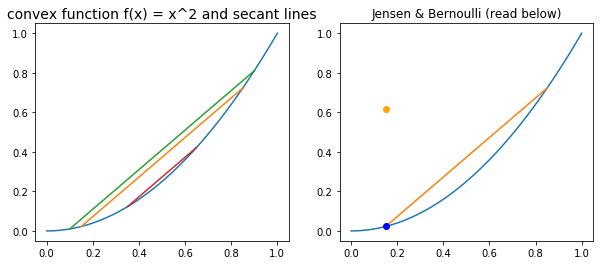

To understand how this idea affects an rv X ~ Ber(p)...
 The secant line connects (E[X],g(E[X])) and ((1-E[X]), g(1-E[X])).
The blue dot is (E[X], g(E[X]))
The orange dot is (E[X], E[g(X)]) -- E[g(X)] is x2*g(x2) + x1*g(x1)
The x coordinate of the orange dot is arbitrary, but if it were moved over to the right,
 you can see it corresponds to a y-value on the secant line.


In [88]:
def g(x):
    return x**2
x = np.linspace(0, 1, 50)
gvect = np.vectorize(g)
y = gvect(x)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('convex function f(x) = x^2 and secant lines', fontsize=14)
plt.plot(x, y)
plt.plot([0.15, 0.85], gvect([0.15, 0.85]))
plt.plot([0.1, 0.9], gvect([0.1, 0.9]))
plt.plot([0.35, 0.65], gvect([0.35, 0.65]))

plt.subplot(1, 2, 2)
plt.title('Jensen & Bernoulli (read below)')
plt.plot(x, y)
plt.plot([0.15, 0.85], gvect([0.15, 0.85]))
plt.plot(0.15, g(0.15), 'o', c='b')
plt.plot(0.15, 0.15 * g(0.15) + 0.85 * g(0.85), 'o', c='orange')
plt.show()

print('To understand how this idea affects an rv X ~ Ber(p)...\n The secant line connects (E[X],g(E[X])) and ((1-E[X]), g(1-E[X])).')
print('The blue dot is (E[X], g(E[X]))')
print('The orange dot is (E[X], E[g(X)]) -- E[g(X)] is x2*g(x2) + x1*g(x1)')
print('The x coordinate of the orange dot is arbitrary, but if it were moved over to the right,\n you can see it corresponds to a y-value on the secant line.')


If $x_1 = 0$ and $x_2 = 1$, the inequality can be interpeted as follows. Let $X \sim Ber(t)$, $0 \leq t \leq 1$, then the right and left hand sides of the inequality can be rewritten respectively as:

- $g(t(0) + (1 - t)(1)) = g(1 - t) = g(E[X])$

- $tg(x_1) + (1 - t)(x_2) = E[g(X)]$

Which implies

- $g(E[X]) \leq E[g(X)]$ for any Bernoulli and convex g

#### This is true for all random variables, and the reverse can be said when g is concave.

- <b>Visual/Memory aid:</b> On the graph above the x values of the secant lines were chosen to correspond to possible Bernoulli $p$ and $1 - p$. $g(E[X])$ is always somewhere on the graph of $g$, and $E[g(x)]$ is always somewhere on the secant line dominating g.

# Variance of an Estimator <a name='p4' />

- $var(X) = E[X^2] - (E[X])^2$

Estimators are R.V.s, so their variance can be calculated.

Example: remember that $var(aX) = a^2 var(X)$, so...

- $var(\bar{X}_n) = var(\frac{X_1 + ... + X_n}{n}) = \frac{1}{n^2} * var(X_1 + ... + X_n) = \frac{n var(X)}{n^2} = \frac{var(X)}{n}$

Other examples $(X \sim Ber(p))$:
- $var(X_1) = p(1-p)$
- $var(\bar{X}_n) = \frac{p(1-p)}{n}$
- $var(\frac{X_1 - X_2}{2}) = \frac{p(1-p)}{2}$
- $var(\sqrt{X_1 = 1, X_2 = 1}) = var(Ber(p^2)) = p^2(1-p^2)$

# Quadratic Risk <a name='p5' />

$R(\hat{\theta}_n) = E[(\hat{\theta}_n - \theta)^2]$

is known as <i>quadratic risk</i> in classical statistics and <i>mean squared error</i> in bayesian statistics.

- low quadratic risk means that both bias and variance are small.

Take the formula, add and subtract $E[\hat{\theta}_n]$ inside the expectation, since the two terms cancel out and it remains the same, then expand the square.

$E[(\hat{\theta}_n - E[\hat{\theta}_n] + E[\hat{\theta}_n] - \theta)^2]$

$= E[(\hat{\theta}_n - E[\hat{\theta}_n])^2] \quad + \quad E[(E[\hat{\theta}_n] - \theta)^2] \quad + \quad 2E[(\hat{\theta}_n - E[\hat{\theta}_n])(E[\hat{\theta}_n] - \theta)]$

... where

$E[(\hat{\theta}_n - E[\hat{\theta}_n])^2]$ is the variance of $\hat{\theta}_n$

$E[(E[\hat{\theta}_n] - \theta)^2]$  is the $bias^2$ of $\hat{\theta}_n$

and

$(\hat{\theta}_n - E[\hat{\theta}_n]) = 0 \rightarrow 2E[(\hat{\theta}_n - E[\hat{\theta}_n])(E[\hat{\theta}_n] - \theta)] = 0$

so, <b>quadratic risk</b> = $variance$ + $bias^2$

# Confidence Intervals <a name='p6' />

Let $(E, (\mathbb{P}_\theta)_{\theta \in \Theta})$ be a statistical model based on observations $X_1, ..., X_n$, and assume $\Theta \in \mathbb{R}$. Let $\alpha \in (0, 1)$.

- <b>Confidence Interval of level $1 - \alpha$</b> for $\theta$: Any random (depending on $X_1, ..., X_n$) interval $\mathcal{I}$ whose boundaries do not depend on $\theta$ and such that:

$\mathbb{P}[\mathcal{I} \ni \theta] \geq 1 - \alpha, \quad \forall \theta \in \Theta$

- <b>Confidence Interval of asymptotic level $1 - \alpha$</b> for $\theta$: Any random interval $\mathcal{I}$ whose boundaries do not depend on $\theta$ and such that:
    
$\lim_{n \to \infty} \mathbb{P}[\mathcal{I} \ni \theta] \geq 1 - \alpha, \quad \forall \theta \in \Theta$

- Note: $\mathcal{I} \ni \theta$ is the same as saying $\theta \in \mathcal{I}$, but the reversal is used here to emphasize the randomness of $\mathcal{I}$. Rather than 'theta in the CI', it's 'CI contains theta'.

- <i>for a code sim / graphic representation of CI and confidence level, showing how alpha is at first set, then manifests through iterations of estimation, see 'Unit 2 Lecture 3 Notes', 'Trinity of Statistical Inference'.</i>